# Section 2 - Implementing Markowitz



* In the presence of a rik-free asset the efficient becomes a straigt line...
* The capital market line!
* All investors should hold a combination of the risk-free asset and the portfolio that maximzes th reward-per-risk ratio.

## Labor Session - Finding the Max Sharpe Ration Portfolio!

We've already seen that given a set of expected returns and covariance matrix, we can plot the efficient frontier. In this lab, we'll extend the code to locate the point on the efficient frontier that we are most interested in, which is the *Tangency* portfolio or the *Max Sharpe Ratio* portfolio.

Let's start by the usual imports, and load in the data:

In [6]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import edhec_risk_kit as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996": "2000"], 12)
cov = ind["1996":"2000"].cov()

In [8]:
ind.sample(3)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
2015-03,-0.0072,-0.0207,-0.0847,-0.0260,0.0056,-0.0198,0.0123,0.0084,-0.0356,0.0333,...,-0.0220,-0.0151,-0.0307,-0.0173,-0.0362,0.0054,0.0101,-0.0029,0.0011,-0.0173
2010-03,0.0444,0.0611,0.0612,0.1206,0.0553,0.0213,0.1139,0.0361,0.0736,0.0842,...,0.0788,0.0522,0.0812,0.0586,0.0811,0.0599,0.0614,0.0827,0.0814,0.0907
1962-08,0.0004,0.0445,0.0165,0.0595,0.0423,0.0136,0.0316,-0.0792,0.0446,-0.0072,...,0.0158,0.0118,0.0303,0.0290,0.0337,0.0433,0.0443,0.0074,0.0380,0.0581


In [9]:
er.sample(3)

Trans    0.071099
Steel    0.115809
Meals    0.067400
dtype: float64

In [12]:
cov.head(3)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002609,0.002379,0.002061,0.000846,0.001035,0.001374,0.001733,0.001230,0.001414,0.001216,...,0.000667,0.000237,-0.000315,0.001429,0.001534,0.000740,0.001363,0.001230,0.002132,0.001057
Beer,0.002379,0.005264,0.001359,0.001348,0.000865,0.002804,0.001704,0.001955,0.001460,0.002005,...,0.001146,0.000438,0.000007,0.001710,0.002284,0.000697,0.001690,0.001822,0.002571,0.001383
Smoke,0.002061,0.001359,0.008349,0.000379,-0.000128,0.001167,0.000950,0.001038,0.000853,0.000779,...,0.000062,-0.000218,-0.000120,0.001327,0.000396,0.001707,0.000105,0.000703,0.001312,0.001741


We already know how to identify points on the curve if we are given a target rate of return. Instead of minimizing the vol based on a target return, we want to find that one point on the curve that maximized the Harpe Ration, given the risk free rate. This is implemented in the function `.msr(riskfree_rate, er, cov)` in the helper module `edhec_risk_kit.py`.

So let's guess where the point might be:

(0.0, 0.14178366250989724)

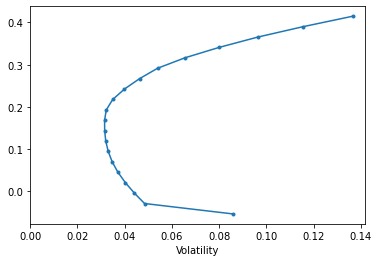

In [21]:
ax = erk.plot_ef(20, er, cov)
ax.set_xlim(left=0)

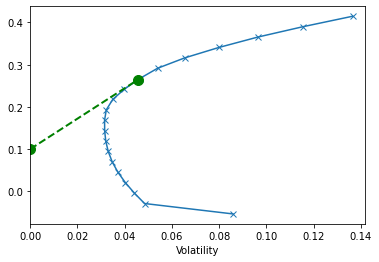

In [23]:
# Let's plot the multi-asset efficient frontier
# Or the Max Sharpe Ratio Portfolio
erk.plot_ef(20, er, cov, style='x-', show_cml=True, riskfree_rate=0.1);

## Lack of Robustness of Markowitz Analysis

* Estimation error is the key challenge in portfolio analysis
*  If you feed an optimizer with parameters that are severely mis-estimated, with lot of estimation errors embedded in them, you're going to get a portfolio that's not going to be a very meaningful
*  optimizers tend to act as error maximizing machines. Typically, the asset that gets the largest allocation is the asset that suffers from the largest amount of estimation risk.
* Expected return estimates are much harder to obtain with a good degree of accuracy compared to variance-covariance matrix estimates
* The problem is particularly important when it comes to expected return estimates

Improving parameter estimates:

* Various methodologies exist for improving estimates for expected returns and covariance aparemters
* However, some uncertainty always remains which are large fro expected returns
* It is possible to avoid using expected returns in the markowitz analysis. Since it is very noisy
* It is done by focusing on the only portfolio on the efficient frontier for which no expected return parameter is needed.
* That portfolio is known as *the global minimum variance porfolio*. Extremely popular in investment management:
* We minimize the variance without any expected return targets.

> The GMV is the portfolio that is least sensitive to errors in parameter estimates. Since it requires no expected return estimates, it is only sensitive to errors in risk parameter estimates.  

## To Wrap UP

* Markowitz analysis is hardly used in practice since it tends to yield unreasonable corner solutions
* This is bc. of the presence of parameter estimates

Question:
Consider the S&P500 universe. Which portfolio is most likely to have the highest Sharpe ratio? 
[ ] The Maximum Sharpe ratio portfolio estimated on the basis of sample estimates for covariance and expected return parameters?
        Nope the MSR portfolio based on sample estimates is highly subject to estimatio errors, and will most likely have a poor out-of-sample Sharpe
[x] The equally-weighted portfolio?
        Yes: The EW is not subject to any estimation error and as a resutl will likely have a higher risk-adjusted performance compared to the MSR portfolio based on sample estimates.

## Lab Session - Lack of Robustness of the Markowitz procedure and the GMV portfolio

Although the promise of the Markowitz procedure is exciting, it tends to fall apart in practice. The problem is that we rarely know Expected Returns and Expected Covariance in advance. Our estimates almost certainly contain some estimation error, and we'll see that the procedure is highly sensitve to there errors, which tend to get exaggerated in the portfolio.

In [24]:
# Let's look at 2-asset portfolio and find the optimal wights
# if we had known what hte returns would be

l = ["Food", "Steel"]
# riskfree rate of 10%
erk.msr(0.1, np.array(er[l]), cov.loc[l, l])

array([0.75040363, 0.24959637])

In [25]:
# Let's look at the returns of the two assets that dictated those weights
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

In [27]:
# Now assume that we had a really good estimator, 
# and we were off by only a fraction of a percent in our estimate
erk.msr(0.1, np.array([.11, .12]), cov.loc[l, l])

array([0.57930354, 0.42069646])

We see that even a small change in the estimate causes a major change in the weights. What if we were off by around 1% to 2% percent in each estimate and estimated 10% and 13% instead of the return of 11.6% and 11.5%?

In [28]:
erk.msr(.1, np.array([.1, .13]), cov.loc[l,l])

array([0., 1.])

### # Avoiding estimating returns

Let's look at the efficient frontier one more time, and plot the efficient frontier again.

<AxesSubplot:xlabel='Volatility'>

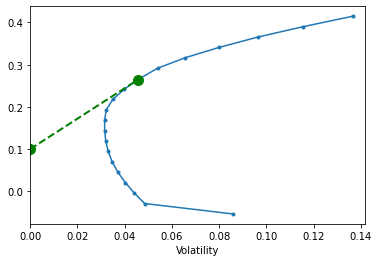

In [29]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1)

One way to avoid this estimation game is to skip the entire process and just rely on _naive_ diversification, which means hold all stocks with equal weight. We can add the EW portfolio to the plot by enhancing the `plot_ef` function as follows:

```python
    if show_ew:
        n = er.shape[0]
        w_ew = np.repeat(1/n, n)
        r_ew = portfolio_return(w_ew, er)
        vol_ew = portfolio_vol(w_ew, cov)
        # add EW
        ax.plot([vol_ew], [r_ew], color='goldenrod', marker='o', markersize=10)
```


<AxesSubplot:xlabel='Volatility'>

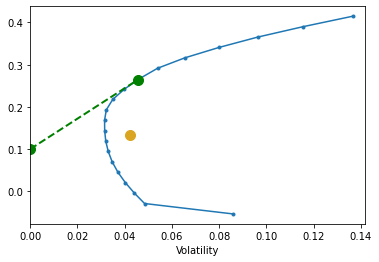

In [30]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True)

Researchers have shown that the EW portfolio is a remarkably good portfolio to hold...  
However, there is another point on the efficient frontier that is very interesting: the nose of the hull, which is the portfolio of lowest volatility across all possible portfolio. This is called the Minimum Volatility or the Global Minimum Volatility or GMV portfolio.

The interesting thing about it is that if you assume that all returns are the same, the optimizer cannot improve the sharpe ratio through raising returns, and so it must do so by lowering volatility. This means that if we just skip any returns estimation and assume all returns have the same return, we'd get the weights of the GMV portfolio!

<AxesSubplot:xlabel='Volatility'>

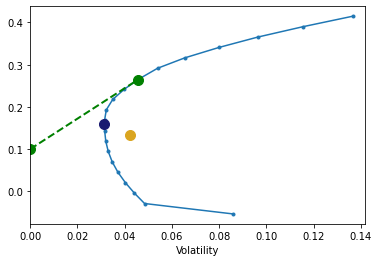

In [31]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)